In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import cycle


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

#class
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from dmba import plotDecisionTree

from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import PrecisionRecallDisplay

#score
from sklearn.metrics import precision_score, accuracy_score, roc_auc_score, confusion_matrix,f1_score, roc_curve, auc, recall_score

from sklearn.datasets import make_blobs
from sklearn.svm import LinearSVC

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix

import tkinter
import matplotlib
#matplotlib.use('TkAgg')

In [2]:
def evaluateBinaryClassification(predictions, actuals):
    contigency = pd.crosstab(actuals,predictions)
    TP = contigency[1][1]
    TN = contigency[0][0]
    FP = contigency[1][0]
    FN = contigency[0][1]
    n = contigency.sum().sum()

    Acuracy = (TP + TN)/n
    Recall = TP/(TP+FN)
    Precision = TP/(TP+FP)
    FScore = 2*Recall*Precision/(Recall+Precision)
    
    return Acuracy, Recall, Precision, FScore

#Read data

In [3]:
#Read data
df_agg = pd.read_csv("Sample Data/FS_ALL.csv")
df_agg.head()

,"Total debt service (% of exports of goods, services and primary income)",Short-term debt (% of total external debt),Real interest rate (%),Total reserves minus gold (in %),Trade (% of GDP),Imports of goods and services (current US$),Exports of goods and services (current US$),Current account balance (% of GDP),"Portfolio investment, net (BoP, current US$)","Foreign direct investment, net inflows (% of GDP)",...,Left Government (democ),Polity (polity),Durable (durable),Turnover (xconst),Legislative/Executive election (exrec),State fragility index (sfi),Years (poleff),Economic Effectiveness (ecoeff),Presist (presistance),Target
0,0.0,0.0,0.511705,1.000000,0.380783,0.002563,0.003350,0.453849,0.206589,0.038336,...,1.0,1.0,0.775862,1.0,1.0,0.166667,0.0,0.0,1.0,0.0
1,0.0,0.0,0.512088,0.848367,0.371018,0.003331,0.003961,0.461811,0.206589,0.038640,...,1.0,1.0,0.784483,1.0,1.0,0.166667,0.0,0.0,1.0,0.0
2,0.0,0.0,0.511337,0.664417,0.338931,0.004087,0.005054,0.469933,0.206589,0.048814,...,1.0,1.0,0.793103,1.0,1.0,0.166667,0.0,0.0,1.0,0.0
3,0.0,0.0,0.509767,0.472346,0.347603,0.006803,0.007776,0.476156,0.206589,0.073088,...,1.0,1.0,0.801724,1.0,1.0,0.166667,0.0,0.0,1.0,0.0
4,0.0,0.0,0.508391,0.404584,0.356862,0.008622,0.009476,0.483780,0.206589,0.043774,...,1.0,1.0,0.810345,1.0,1.0,0.166667,0.0,0.0,1.0,0.0


In [4]:
from sklearn import svm

# 讀入資料
X = df_agg.drop(columns=['Target','Short-term debt (% of total external debt)','Total debt service (% of exports of goods, services and primary income)'])
X = X.values
y = df_agg['Target'].values

# 切分訓練與測試資料
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [5]:
# 建立分類器
clf = svm.SVC(kernel='rbf',C=30,gamma='auto')
clf.fit(X_train, y_train)
clf.score(X_test,y_test)
# 預測
y_pred = clf.predict(X_test)
#print(y_pred)

Confusion Matrix:
 [[45  0]
 [ 5  2]]
Accuracy: 0.9038461538461539
Recall Score (Macro) 0.6428571428571428
Recall Score (Default) 0.2857142857142857
Precision Score (Macro) 0.95
Precision Score (Default) 1.0
F1 Score (Macro): 0.695906432748538
F1 Score (Default): 0.4444444444444445
ROC_AUC Score 0.6428571428571428


C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


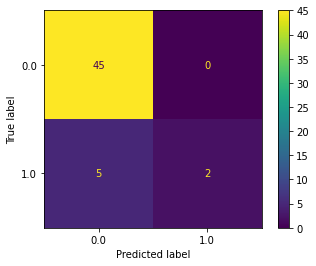

In [6]:
# 績效
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

print("Recall Score (Macro)", recall_score(y_test, y_pred, average='macro',zero_division=1))
print("Recall Score (Default)", recall_score(y_test, y_pred, zero_division=1))     

print("Precision Score (Macro)",precision_score(y_test, y_pred, average='macro',zero_division=1))
print("Precision Score (Default)",precision_score(y_test, y_pred, zero_division=1))

print("F1 Score (Macro):", f1_score(y_test, y_pred, average='macro'))
print("F1 Score (Default):", f1_score(y_test, y_pred,zero_division=1))

print("ROC_AUC Score",roc_auc_score(y_test,y_pred,multi_class='ovr'))
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

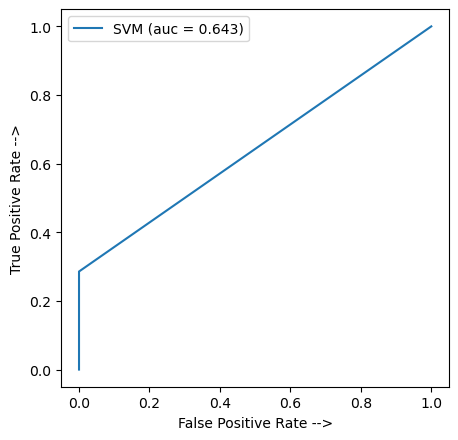

In [7]:
svm_fpr, svm_tpr, threshold = roc_curve(y_test, y_pred)
auc_svm = auc(svm_fpr, svm_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM (auc = %0.3f)' % auc_svm)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()
plt.show()

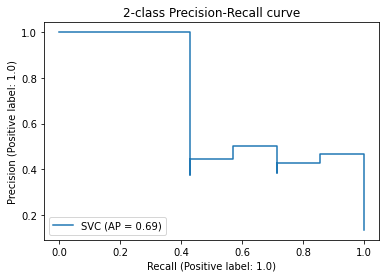

In [8]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    clf, X_test, y_test, name="SVC"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

Kfold Corss Validation

GridSearch CV

In [9]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(svm.SVC(gamma='auto'), {
    'C': [1,10,20],
    'kernel': ['rbf','linear']
}, cv=5, scoring=['recall','f1'],refit='f1',verbose=2)
clf.fit(X_test, y_test)
clf.cv_results_
y_pred = clf.predict(X_test)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ....................................C=1, kernel=rbf; total time=   0.0s
[CV] END ....................................C=1, kernel=rbf; total time=   0.0s
[CV] END ....................................C=1, kernel=rbf; total time=   0.0s
[CV] END ....................................C=1, kernel=rbf; total time=   0.0s
[CV] END ....................................C=1, kernel=rbf; total time=   0.0s
[CV] END .................................C=1, kernel=linear; total time=   0.0s
[CV] END .................................C=1, kernel=linear; total time=   0.0s
[CV] END .................................C=1, kernel=linear; total time=   0.0s
[CV] END .................................C=1, kernel=linear; total time=   0.0s
[CV] END .................................C=1, kernel=linear; total time=   0.0s
[CV] END ...................................C=10, kernel=rbf; total time=   0.0s
[CV] END ...................................C=10,

Confusion Matrix:
 [[45  0]
 [ 1  6]]
Accuracy: 0.9807692307692307
Recall Score (Macro) 0.9285714285714286
Recall Score (Default) 0.8571428571428571
Precision Score (Macro) 0.9891304347826086
Precision Score (Default) 1.0
F1 Score (Macro): 0.956043956043956
F1 Score (Default): 0.923076923076923
ROC_AUC Score 0.9285714285714286


C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


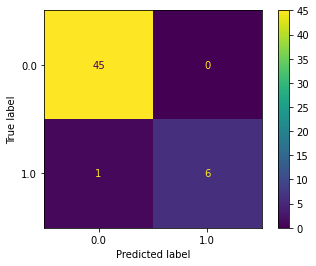

In [10]:
# AFTER CV 
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

print("Recall Score (Macro)", recall_score(y_test, y_pred, average='macro',zero_division=1))
print("Recall Score (Default)", recall_score(y_test, y_pred, zero_division=1))     

print("Precision Score (Macro)",precision_score(y_test, y_pred, average='macro',zero_division=1))
print("Precision Score (Default)",precision_score(y_test, y_pred, zero_division=1))

print("F1 Score (Macro):", f1_score(y_test, y_pred, average='macro'))
print("F1 Score (Default):", f1_score(y_test, y_pred,zero_division=1))
print("ROC_AUC Score",roc_auc_score(y_test,y_pred,multi_class='ovr'))
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

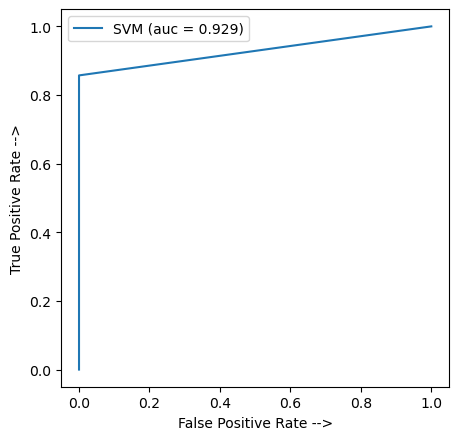

In [11]:
svm_fpr, svm_tpr, threshold = roc_curve(y_test, y_pred)
auc_svm = auc(svm_fpr, svm_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM (auc = %0.3f)' % auc_svm)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()
plt.show()


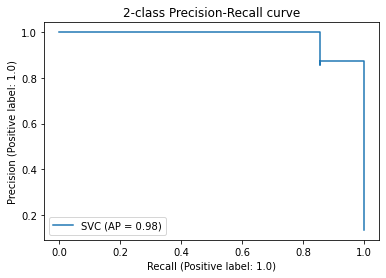

In [12]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    clf, X_test, y_test, name="SVC"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [13]:
df = pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_recall,split1_test_recall,split2_test_recall,...,std_test_recall,rank_test_recall,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,split4_test_f1,mean_test_f1,std_test_f1,rank_test_f1
0,0.0004,4.899792e-04,0.0018,4.002334e-04,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.0,0.0,0.0,...,0.000000,6,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,6
1,0.0000,0.000000e+00,0.0014,4.899209e-04,1,linear,"{'C': 1, 'kernel': 'linear'}",0.0,0.5,0.0,...,0.400000,3,0.0,0.666667,0.0,0.0,1.000000,0.333333,0.421637,3
2,0.0010,4.862804e-07,0.0010,5.091228e-07,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.0,0.5,0.0,...,0.400000,3,0.0,0.666667,0.0,0.0,1.000000,0.333333,0.421637,3
3,0.0010,2.336015e-07,0.0010,2.861023e-07,10,linear,"{'C': 10, 'kernel': 'linear'}",0.0,0.5,0.0,...,0.447214,1,0.0,0.666667,0.0,1.0,0.666667,0.466667,0.400000,1
4,0.0008,4.000665e-04,0.0012,4.001618e-04,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.0,0.5,0.0,...,0.400000,3,0.0,0.666667,0.0,0.0,1.000000,0.333333,0.421637,3
5,0.0004,4.899208e-04,0.0010,1.784161e-07,20,linear,"{'C': 20, 'kernel': 'linear'}",0.0,0.5,0.0,...,0.447214,1,0.0,0.666667,0.0,1.0,0.666667,0.466667,0.400000,1


randomizedSearchCV

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [15]:
from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(svm.SVC(gamma='auto'), {
        'C': [1,10,20],
        'kernel': ['rbf','linear']
    }, cv=5, scoring=['recall','f1'],refit='f1',verbose=2, n_iter=2
)
rs.fit(X_train, y_train)
y_pred = rs.predict(X_test)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END ...................................C=20, kernel=rbf; total time=   0.0s
[CV] END ...................................C=20, kernel=rbf; total time=   0.0s
[CV] END ...................................C=20, kernel=rbf; total time=   0.0s
[CV] END ...................................C=20, kernel=rbf; total time=   0.0s
[CV] END ...................................C=20, kernel=rbf; total time=   0.0s
[CV] END ...................................C=10, kernel=rbf; total time=   0.0s
[CV] END ...................................C=10, kernel=rbf; total time=   0.0s
[CV] END ...................................C=10, kernel=rbf; total time=   0.0s
[CV] END ...................................C=10, kernel=rbf; total time=   0.0s
[CV] END ...................................C=10, kernel=rbf; total time=   0.0s


Confusion Matrix:
 [[45  0]
 [ 5  2]]
Accuracy: 0.9038461538461539
Recall Score (Macro) 0.6428571428571428
Recall Score (Default) 0.2857142857142857
Precision Score (Macro) 0.95
Precision Score (Default) 1.0
F1 Score (Macro): 0.695906432748538
F1 Score (Default): 0.4444444444444445
ROC_AUC Score 0.6428571428571428


C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


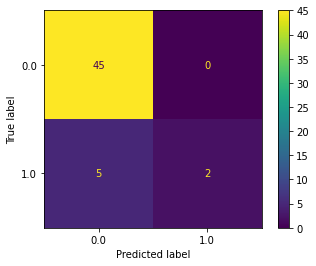

In [16]:
# AFTER CV 
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

print("Recall Score (Macro)", recall_score(y_test, y_pred, average='macro',zero_division=1))
print("Recall Score (Default)", recall_score(y_test, y_pred, zero_division=1))     

print("Precision Score (Macro)",precision_score(y_test, y_pred, average='macro',zero_division=1))
print("Precision Score (Default)",precision_score(y_test, y_pred, zero_division=1))

print("F1 Score (Macro):", f1_score(y_test, y_pred, average='macro'))
print("F1 Score (Default):", f1_score(y_test, y_pred,zero_division=1))
print("ROC_AUC Score",roc_auc_score(y_test,y_pred,multi_class='ovr'))
plot_confusion_matrix(rs, X_test, y_test)  
plt.show()

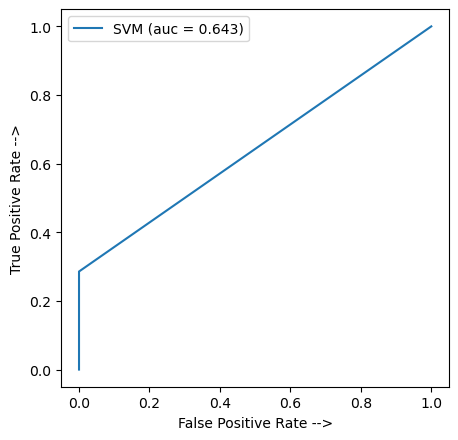

In [17]:
svm_fpr, svm_tpr, threshold = roc_curve(y_test, y_pred)
auc_svm = auc(svm_fpr, svm_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM (auc = %0.3f)' % auc_svm)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()
plt.show()

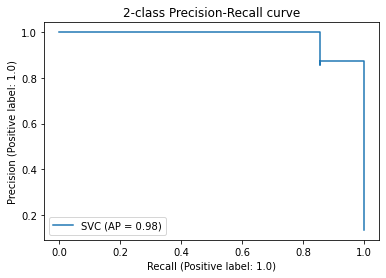

In [18]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    clf, X_test, y_test, name="SVC"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")